## Load & scale data

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.cluster import  KMeans

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
df = pd.read_csv("Mall_Customers.csv")

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.columns = ['CustomerID','Gender','Age','AnnualIncome','SpendingScore']

In [11]:
X = df[['AnnualIncome','SpendingScore']]

In [12]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

## Elbow Method

Text(0.5, 1.0, 'Elbow Method for Optimal k')

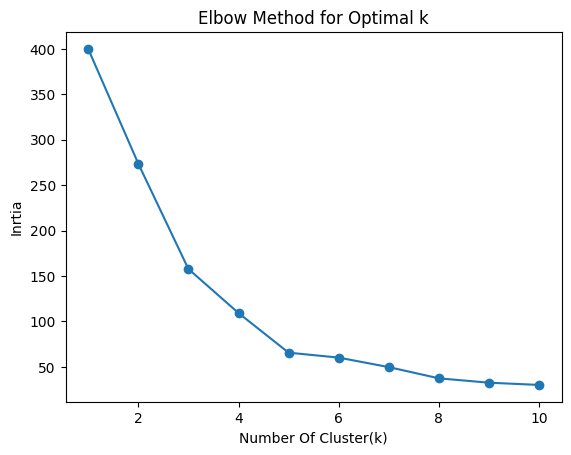

In [14]:
k_values = range(1,11)
inertia =[]

for k in k_values:
    kmenas = KMeans(n_clusters=k,random_state=42)
    kmenas.fit(X_scaler)
    inertia.append(kmenas.inertia_)


plt.figure()
plt.plot(k_values,inertia,marker = 'o')
plt.xlabel('Number Of Cluster(k)')
plt.ylabel('Inrtia')
plt.title('Elbow Method for Optimal k')

## Silhouette Score

In [16]:
for k in range(2,11):
    kmenas = KMeans(n_clusters=k,random_state=42)
    labels = kmenas.fit_predict(X_scaler)
    score = silhouette_score(X_scaler,labels)
    print(f"k = {k},Silhouette Score = {score:.3f}")

k = 2,Silhouette Score = 0.397
k = 3,Silhouette Score = 0.467
k = 4,Silhouette Score = 0.494
k = 5,Silhouette Score = 0.555
k = 6,Silhouette Score = 0.514
k = 7,Silhouette Score = 0.502
k = 8,Silhouette Score = 0.455
k = 9,Silhouette Score = 0.457
k = 10,Silhouette Score = 0.445


## Final K-Means Model

In [18]:
kmenas = KMeans(n_clusters=5,random_state=42)
labels = kmenas.fit_predict(X_scaler)


df['Cluster'] = labels
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Plot Clusters with Centroids

Text(0.5, 1.0, 'K-Means Clusters with Centroids')

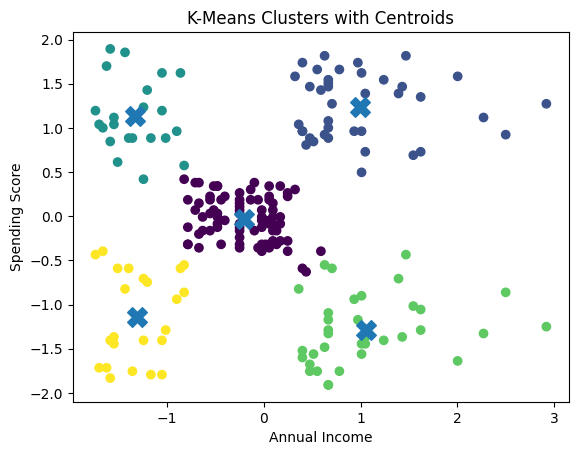

In [20]:
plt.figure()
plt.scatter(X_scaler[:,0],X_scaler[:,1],c =labels)
center = kmenas.cluster_centers_
plt.scatter(center[:,0],center[:,1],marker='X',s= 200)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clusters with Centroids')

### If k is decreased, clusters become larger and more generalized, which can mix different types of customers into the same cluster and reduce interpretability.
### If k is increased, clusters become smaller and more specific, which can lead to over-segmentation where clusters may capture noise instead of meaningful structure.